# Liquid distribution measurement Room1 and Room2
## Image capture for FLV measuring section
### Requirements:
- Python with the required libraries (opencv, yaml, sys, numpy, pandas, aruco, matplotlib)
- Calibration file: calibration_matrix_fisheye_model.yaml must be in the same directory as this file.
- There must be a connection to one of the IP cameras Room1 / Room2.
- Use only with AruCo marker


### Operation manual:
- **Kernel --> restart & run all**
- currently available image sources:
 - (1).......10.49.235.45
 - (2).......10,49,235,169
 - (3).......10,49,235,171
 - (4).......10.49.235.46
 - (5).......Process image from file
 - (6).......use image from iPhone --> contact guko first.
 
- Attach the camera to the power supply and select by IP address (see camera sticker) by entering **1-4**
- make sure that 4 ArUco markers are found --> all 4 markers should be visible in the live image.
- Start measurement: To do this, press the (s) button in the camera live image window
- Enter product number, pressure, volume flow, height, cylinder with the maximum liquid height
- Enter name for Excel file (when you enter, file name is generated from product number, print, etc.).
- saved measurements are in the c:\LiquidDistribution\results directory
- Exit with **File --> Close and halt**, then close the browser window.

### Remarks:
- Please do not change the program code below, otherwise it will probably no longer work.
- Not every error is caught:
 - If the selected camera is not accessible: wait, the program crashes. Restart with kernel --> restart & run all
- Please send any questions, suggestions for improvement or errors to guko -179.

You are in debugging mode.
Multiple input streams are not supported
There will be lots of intermediate steps being printed out
Importing image as a way to debug
Image Path entered:  ./7.jpg
Image captured


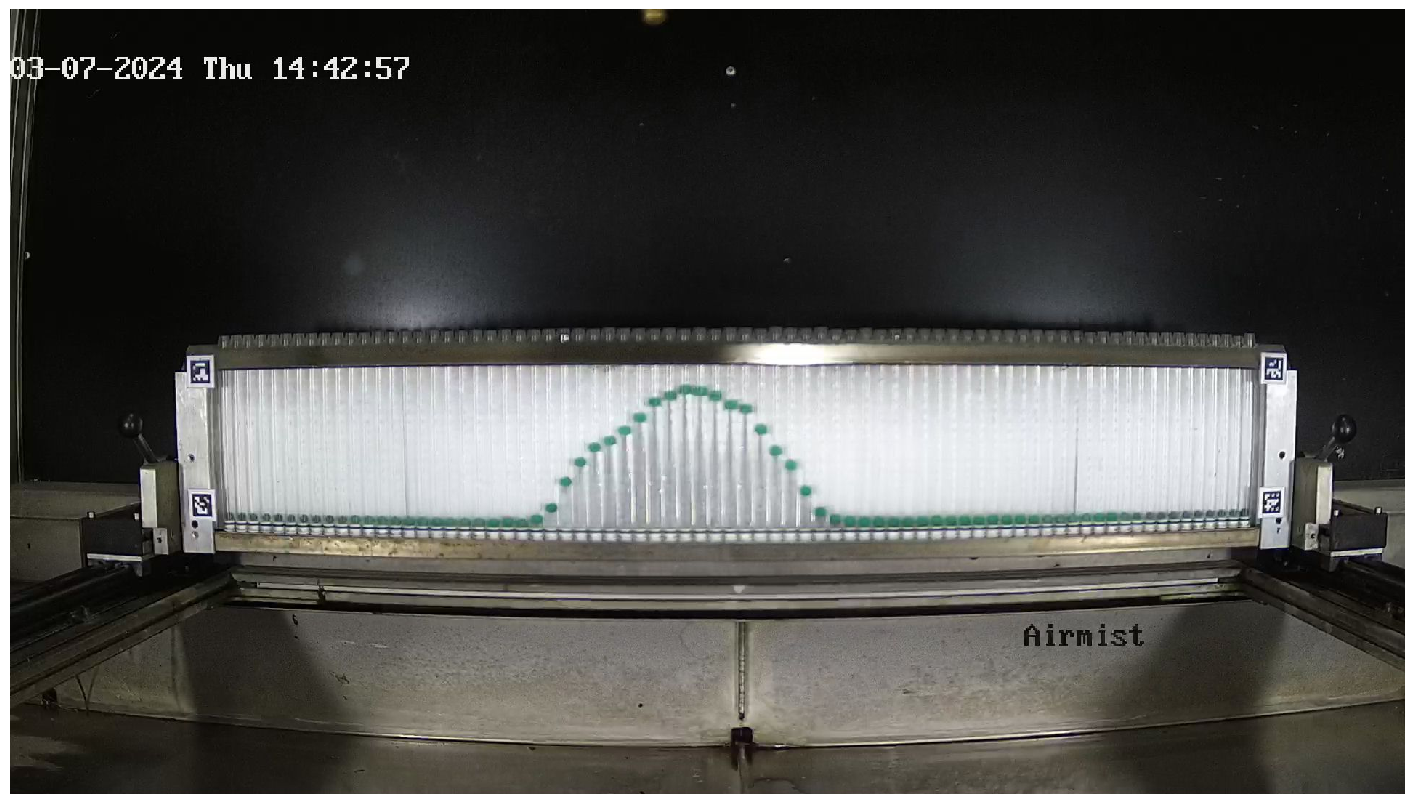

Image after Undistortion


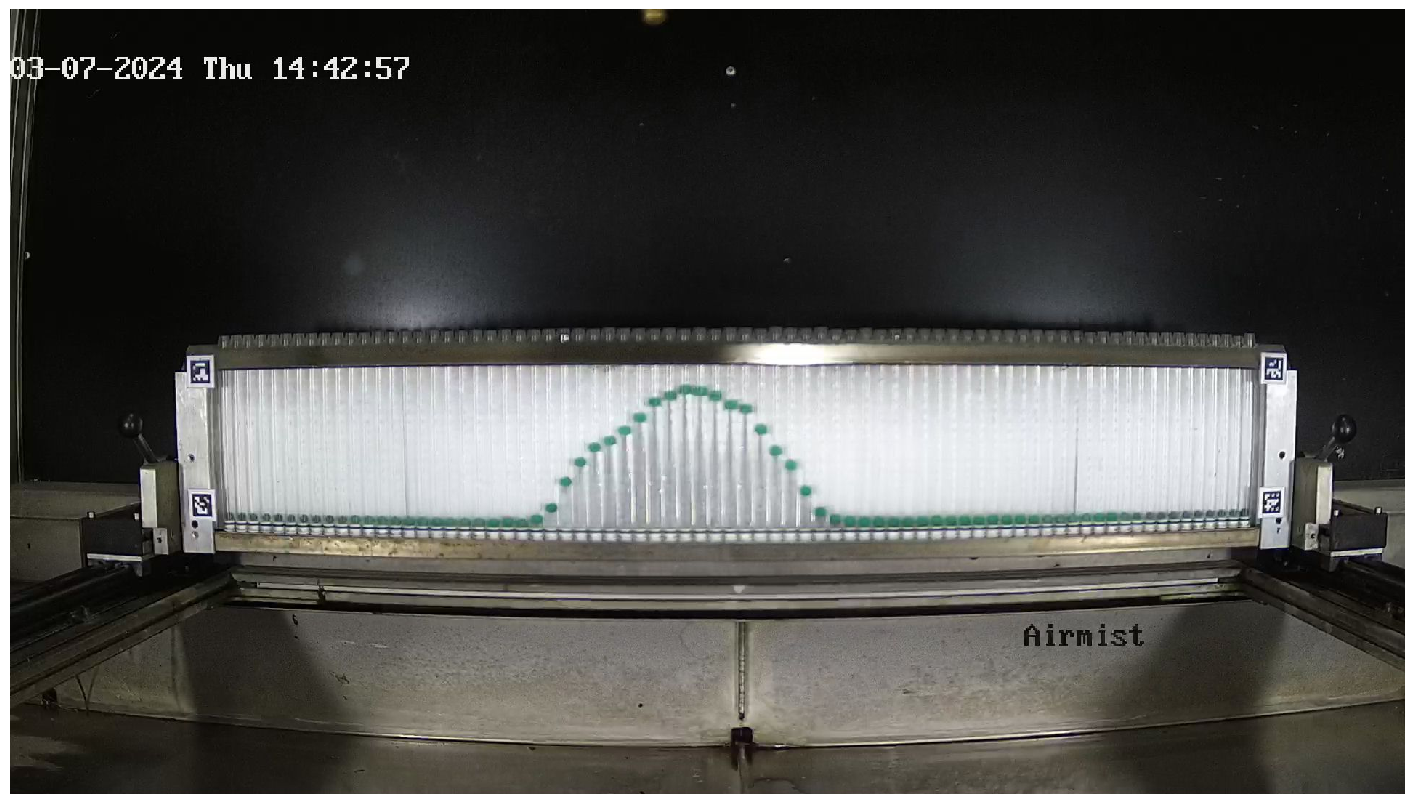

Detected ArUco Markers:
IDs: [[1]
 [3]
 [2]
 [4]]
Corners: (array([[[274., 483.],
        [275., 514.],
        [248., 514.],
        [249., 483.]]], dtype=float32), array([[[250., 667.],
        [275., 667.],
        [277., 698.],
        [252., 696.]]], dtype=float32), array([[[1728.,  479.],
        [1752.,  480.],
        [1751.,  510.],
        [1726.,  508.]]], dtype=float32), array([[[1724.,  664.],
        [1748.,  662.],
        [1747.,  693.],
        [1723.,  693.]]], dtype=float32))
4 ArUco marker detected.
No of Aruco found:  4
Normal image expects 4 aruco detections and live camera for some reason needs 8
The detected arucos are:  [[261.0, 498.5], [1739.5, 494.5], [263.5, 682.5], [1735.5, 678.5]]
Cropped image size (437, 3475)
Cropped Images


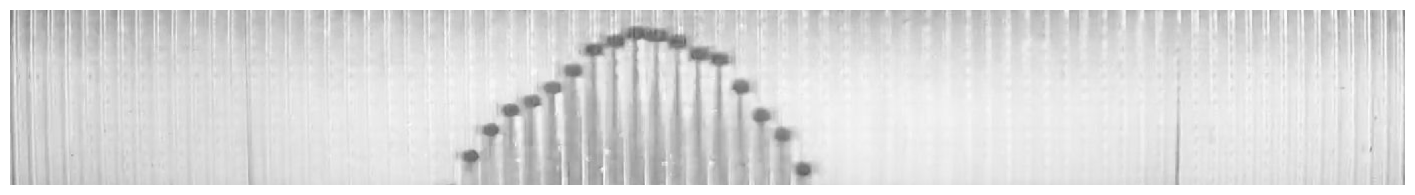

In function morphologic, there are a series of filters applied to extract a kind of a ball at the place of marker
Image Morphed


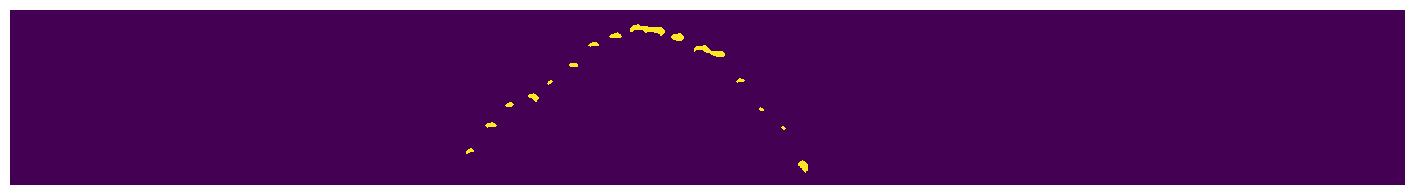

Edges of the markers


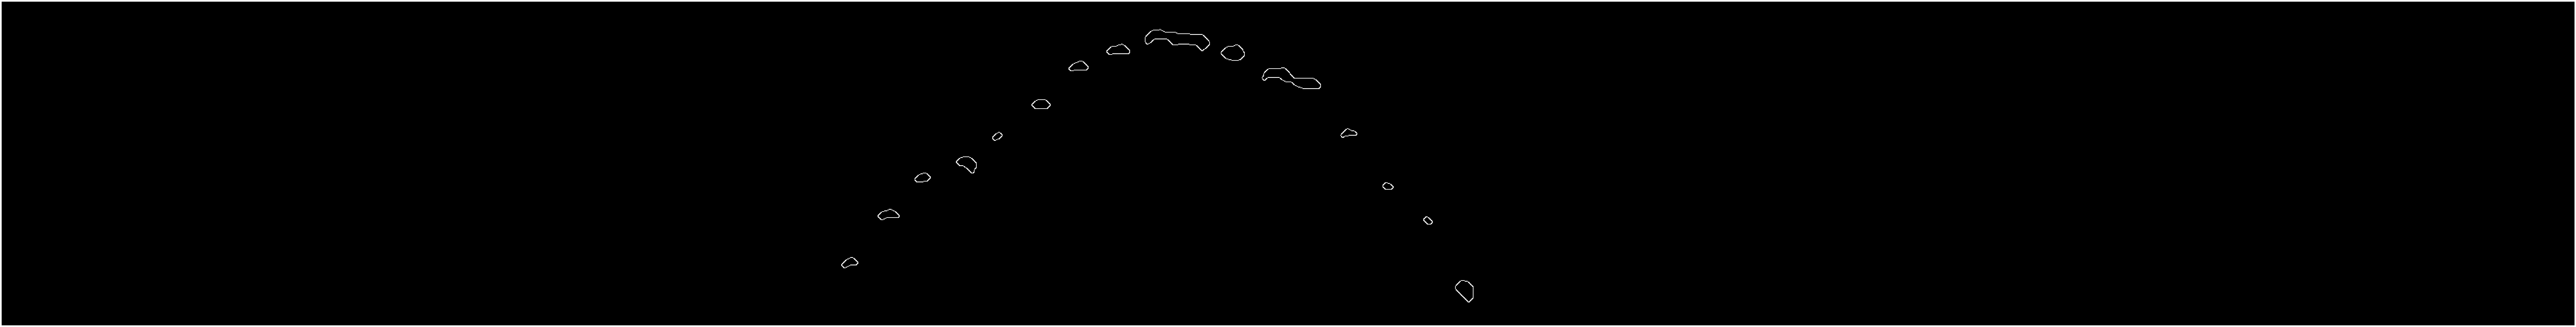

MArkers in black and white


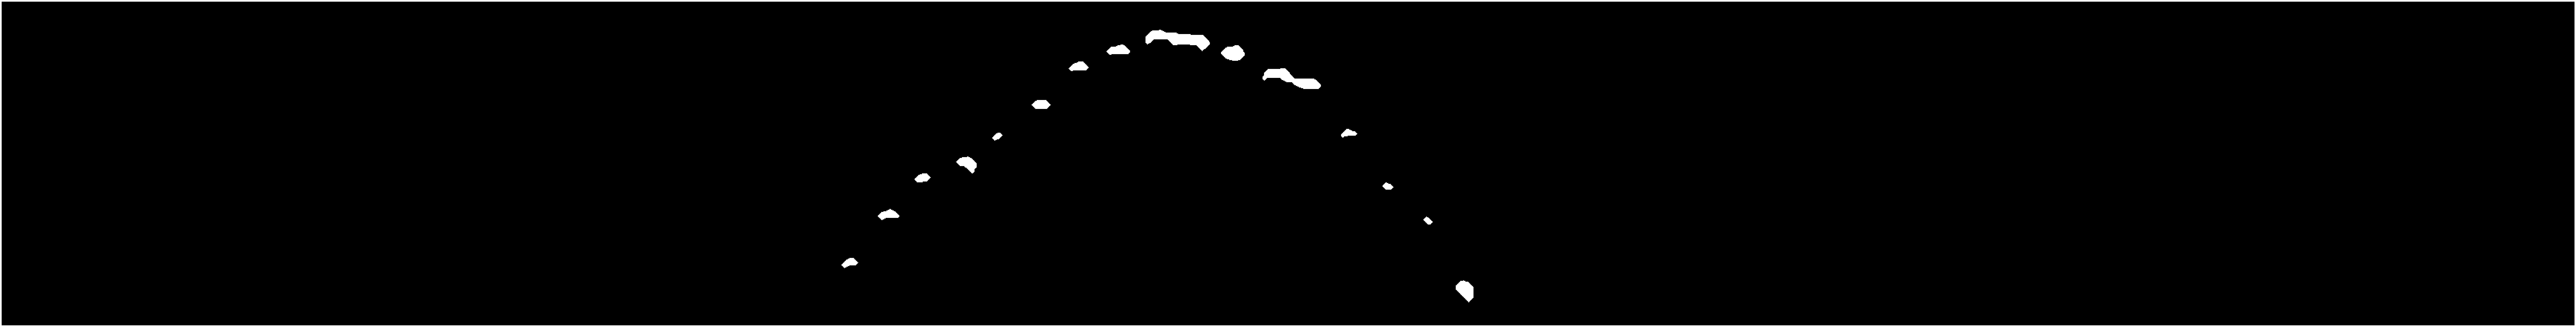

The circles drawn should be coinciding with the markers in the cropped out picture


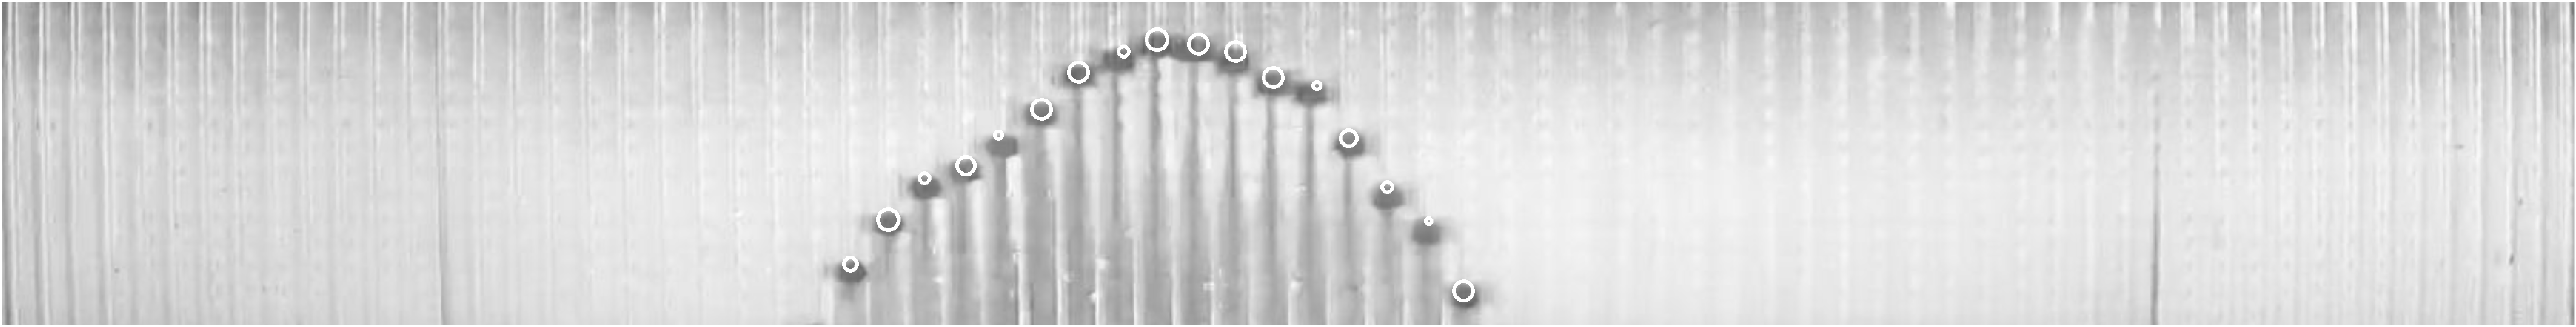

The y pixels:  [354, 294, 238, 221, 180, 145, 95, 67, 51, 57, 67, 102, 113, 184, 250, 296, 390]
8
37
Linear Regression is a ML model
intercept: 15.156053337363982
slope: [-0.02130444]


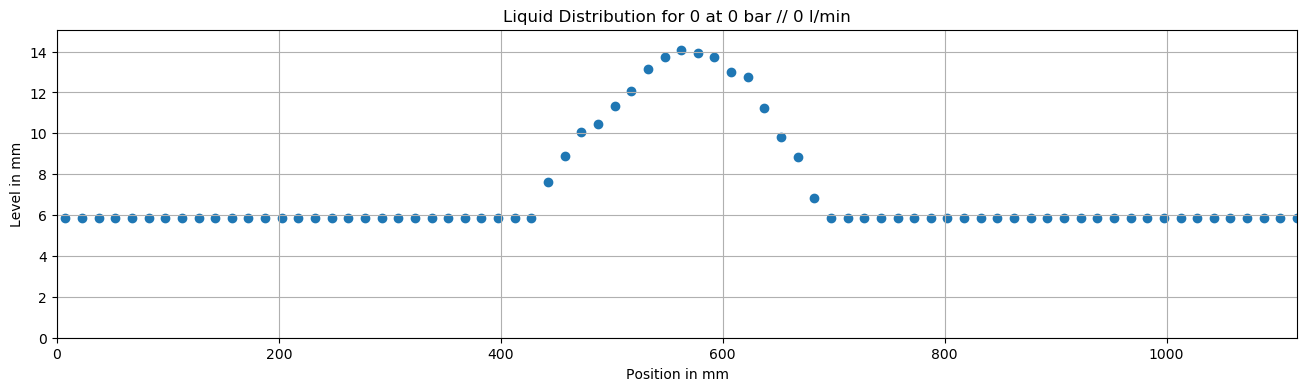

File saved in subfolder ./results. Program ended.


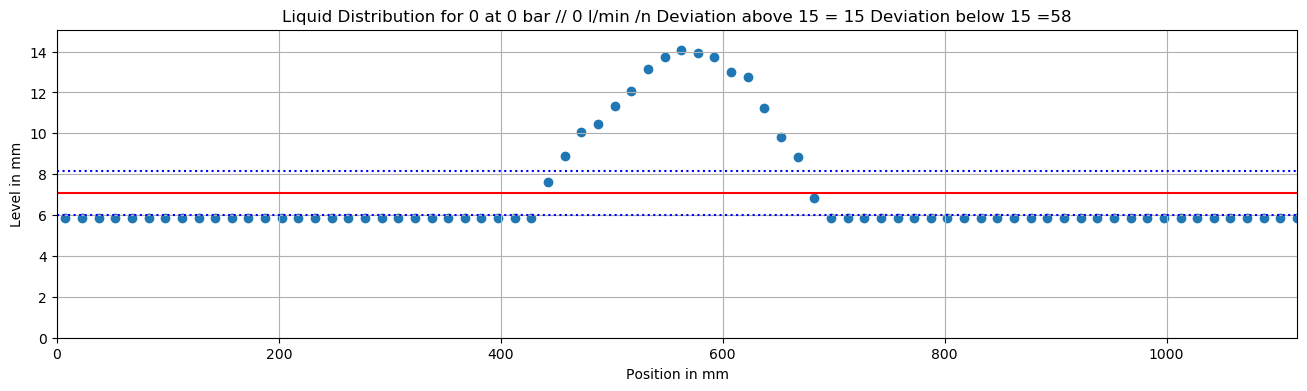

In [1]:
#### Set System Mode
PRODUCTION_MODE = False
DEBUG_MODE = True

#### IMPORT LIBRARIES
import cv2
import numpy as np
import liqdist_archit as ld
from liqdist_archit import detect_arucos
ld.DEBUG_MODE      = DEBUG_MODE
ld.PRODUCTION_MODE = PRODUCTION_MODE

if DEBUG_MODE:
    import matplotlib.pyplot as plt
    print("You are in debugging mode.")
    print("Multiple input streams are not supported")
    print("There will be lots of intermediate steps being printed out")

capture, selector = ld.select_ipcamera()
camera_matrix, distortion_coefficients = ld.read_cam_calibration()

if DEBUG_MODE:
    print("Image captured")
    plt.figure(figsize=(18,18))
    plt.imshow(cv2.cvtColor(capture, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()
# # JUPYTER: The following line is used as a method to track the locations of the aruco markers in live screen
# capture = ld.track(capture,camera_matrix,distortion_coefficients)
img_intrinsic = ld.intrinsic(capture,camera_matrix,distortion_coefficients)
# if DEBUG_MODE:
#     print("Image after aruco tracked")
#     plt.figure(figsize=(18,18))
#     plt.imshow(cv2.cvtColor(capture, cv2.COLOR_BGR2RGB))
#     plt.axis('off')
#     plt.show()

img_intrinsic = capture
if DEBUG_MODE:
    print("Image after Undistortion")
    plt.figure(figsize=(18,18))
    plt.imshow(cv2.cvtColor(img_intrinsic, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()
arucoFound = ld.detect_arucos(capture,camera_matrix,distortion_coefficients)
if DEBUG_MODE:
    if arucoFound is not None:
        print("No of Aruco found: ",len(arucoFound))
    print("Normal image expects 4 aruco detections and live camera for some reason needs 8")
    print("The detected arucos are: ",arucoFound)

img_cr = ld.crop_image(img_intrinsic,arucoFound)
if DEBUG_MODE:
    print("Cropped Images")
    plt.figure(figsize=(18,18))
    plt.imshow(cv2.cvtColor(img_cr, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()  
img_raw = ld.morphologic(img_cr)
if DEBUG_MODE:
    print("Image Morphed")
    plt.figure(figsize=(18,18))
    plt.imshow(img_raw)
    plt.axis('off')
    plt.show() 
# print(cv2.threshold(img_raw,127,255,cv2.THRESH_BINARY))
balls_found = ld.find_balls(img_raw,img_cr)
